### Test1 : Bernoulli example

In [ ]:
#Install cmdstanpy
#see the docs: https://mc-stan.org/cmdstanpy/installation.html

import cmdstanpy
cmdstanpy.install_cmdstan()

In [ ]:
#Bernoulli example
#see the docs: https://mc-stan.org/cmdstanpy/examples/MCMC%20Sampling.html
"""
   
   Here you're loading the program (a.k.a model) "bernoulli.stan" from the 
   examples/bernoulli directory. You can change the structure 
   'os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan')'
   for 'os.path.join(cmdstan_path(), 'examples/bernoulli/bernoulli.stan')' as well.
   
"""
import os
from cmdstanpy import cmdstan_path, CmdStanModel
stan_file = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan') 

In [ ]:
### Set up the model to be used.

model = CmdStanModel(stan_file=stan_file)
print(model)
print(model.exe_info())

In [ ]:
"""
    As you can read in the docs, STAN works with json data files. Nevertheless, it is not 
    necessary for you to convert your data to json; STAN do it for you.
    In the section 2 below, you'll see I give a numpy matrix to the model as data, and STAN 
    is ok with that.

"""
data_file = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.data.json')
fit = model.sample(data=data_file)
print(fit)

In [ ]:
### This is a sumary of the outcome after running the model with the data.
### It shows the mean Logposterior, the infered parameters, and some other data.
fit.summary()

### Part 2: cryo-BIFE routine 

In [1]:
import os
import cmdstanpy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

In [2]:
#enable witgets to tqdm pakage works well.
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
### Loading the cryo-bife.stan program.
my_stanfile = os.path.join('cryoBIFE/cryoBIFE/stan/cryo-bife.stan')
my_model = CmdStanModel(stan_file=my_stanfile, cpp_options={'STAN_THREADS':'true'})

INFO:cmdstanpy:found newer exe file, not recompiling


### Resultados Hexapeptido 

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


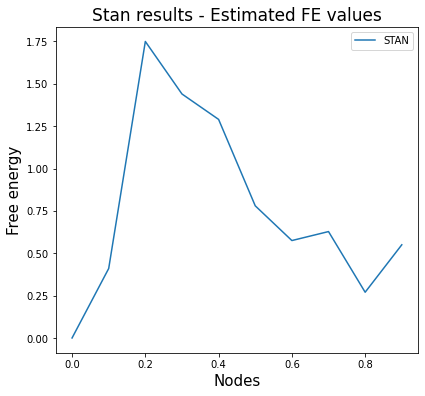

In [4]:
### Loading the matrix probability Pwm (or BioEM matrix prob) as data. 

"""

   The model will infer the free energy values, which are saved in the G_stan numpy array.
   Notice that: 
   N: number of images ; M: number of models in the structural path; Pmat=Pwm

"""
Pmat = np.loadtxt('/home/jgiraldob/path_optimization_github/Discrete_hexapeptide/Pmw-b1')
cryobife_data = {"M": Pmat.shape[1],
                 "N": Pmat.shape[0],
                "Pmat": Pmat}

# run CmdStan's sample method, returns object `CmdStanMCMC`
fit = my_model.sample(data=cryobife_data)
LogPost_Stan = []
LogPost_Stan.append(fit.summary().to_numpy()[0,0])

stan_resume_array = fit.summary().to_numpy()[1:Pmat.shape[1],0]
G_stan = np.zeros((Pmat.shape[1]))

for i in range(len(stan_resume_array)):
    G_stan[i]=stan_resume_array[i]
G_stan
plt.figure(figsize = (6.5,6.))
plt.title('Stan results - Estimated FE values',fontsize=17)
plt.plot([i/Pmat.shape[1] for i in range(Pmat.shape[1])],G_stan - np.min(G_stan),label='STAN')
#plt.plot([i for i in range(Pmat.shape[1])],true_fe_black-np.min(true_fe_black),label='True')
plt.xlabel('Nodes', fontsize=15)
plt.ylabel('Free energy', fontsize=15)
plt.legend()
plt.show()

In [5]:
### Comparison betwen STAN routine and MCMC from cryo-BIFE paper for the hexapeptide system.

Gs_MCMC = np.loadtxt('/home/jgiraldob/path_optimization_github/Discrete_hexapeptide/Gs')[:,2:]
Gs_Mean = np.mean(Gs_MCMC,axis=0)
G_Ave = np.loadtxt('/home/jgiraldob/path_optimization_github/Discrete_hexapeptide/AveG')

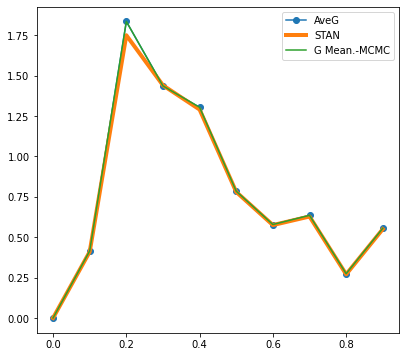

In [7]:
plt.figure(figsize=(6.5,6.))
plt.plot([i/Pmat.shape[1] for i in range(Pmat.shape[1])],G_Ave-np.min(G_Ave),marker='o',label='AveG')
plt.plot([i/Pmat.shape[1] for i in range(Pmat.shape[1])],G_stan - np.min(G_stan),label='STAN', linewidth=4)
plt.plot([i/Pmat.shape[1] for i in range(Pmat.shape[1])],Gs_Mean-np.min(Gs_Mean),label='G Mean.-MCMC')
plt.legend()
plt.show()